# Inference and Reasoning with Bayesian Networks

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Assignment 2

Name: Xinwei Jiang

Student ID: u6591933

## Instructions

|             |Notes|
|:------------|:--|
|Maximum marks| 19|
|Weight|19% of final grade|
|Format| Complete this ipython notebook. Do not forget to fill in your name and student ID above|
|Submission mode| Use [wattle](https://wattle.anu.edu.au/)|
|Formulas| All formulas which you derive need to be explained unless you use very common mathematical facts. Picture yourself as explaining your arguments to somebody who is just learning about your assignment. With other words, do not assume that the person marking your assignment knows all the background and therefore you can just write down the formulas without any explanation. It is your task to convince the reader that you know what you are doing when you derive an argument. Typeset all formulas in $\LaTeX$.|
| Code quality | Python code should be well structured, use meaningful identifiers for variables and subroutines, and provide sufficient comments. Please refer to the examples given in the tutorials. |
| Code efficiency | An efficient implementation of an algorithm uses fast subroutines provided by the language or additional libraries. For the purpose of implementing Machine Learning algorithms in this course, that means using the appropriate data structures provided by Python and in numpy/scipy (e.g. Linear Algebra and random generators). |
| Late penalty | We will not accept late assignments. You will get zero marks if you miss the deadline. Submit early, submit often. | 
| Cooperation | All assignments must be done individually. Cheating and plagiarism will be dealt with in accordance with University procedures (please see the ANU policies on [Academic Honesty and Plagiarism](http://academichonesty.anu.edu.au)). Hence, for example, code for programming assignments must not be developed in groups, nor should code be shared. You are encouraged to broadly discuss ideas, approaches and techniques with a few other students, but not at a level of detail where specific solutions or implementation issues are described by anyone. If you choose to consult with other students, you will include the names of your discussion partners for each solution. If you have any questions on this, please ask the lecturer before you act. |
| Solution | To be presented in the tutorials. |

$\newcommand{\dotprod}[2]{\left\langle #1, #2 \right\rangle}$
$\newcommand{\onevec}{\mathbb{1}}$
$\newcommand{\B}[1]{\mathbf{#1}}$
$\newcommand{\Bphi}{\boldsymbol{\mathsf{\phi}}}$
$\newcommand{\BPhi}{\boldsymbol{\Phi}}$
$\newcommand{\Cond}{\,|\,}$
$\newcommand{\DNorm}[3]{\mathcal{N}(#1\Cond#2, #3)}$
$\newcommand{\DUniform}[3]{\mathcal{U}(#1 \Cond #2, #3)}$
$\newcommand{\Ex}[2][]{\mathbb{E}_{#1} \left[ #2 \right]}$
$\newcommand{\var}[1]{\operatorname{var}[#1]}$
$\newcommand{\cov}[1]{\operatorname{cov}[#1]}$
$\newcommand{\Norm}[1]{\lVert#1\rVert}$
$\DeclareMathOperator*{\argmax}{arg\,max}$

Setting up the environment (Please evaluate this cell to activate the $\LaTeX$ macros.)

In [1]:
# provided code, do not edit

import itertools, copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image

%matplotlib inline

# 1A (1 marks) Matrix-vector identity proof
Given a nonsingular matrix $ \B{A} $ and a vector $ \B{v} $ of comparable
dimension, prove the following identity:
$$
 (\B{A} + \B{v} \B{v}^T)^{-1} 
   = \B{A}^{-1} - \frac{(\B{A}^{-1} \B{v}) (\B{v}^T \B{A}^{-1})}
                       {1 + \B{v}^T \B{A}^{-1} \B{v}}.
$$

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>
$$\begin{align}
&\B{A}^{-1} - \frac{(\B{A}^{-1} \B{v}) (\B{v}^T \B{A}^{-1})}{1 + \B{v}^T \B{A}^{-1} \B{v}}\\
&= {\B{A}^{-1}(1 + \B{v}^T \B{A}^{-1} \B{v}) - (\B{A}^{-1} \B{v}) (\B{v}^T \B{A}^{-1})\over {1 + \B{v}^T \B{A}^{-1} \B{v}}} \\
&= {\B{A}^{-1}+\B{A}^{-1}\B{v}^T\B{A}^{-1}\B{v} - \B{A}^{-1} \B{v}\B{v}^T \B{A}^{-1} \over {1 + \B{v}^T \B{A}^{-1} \B{v}}}\\
&={\B{A}^{-1} \over {1 + \B{v}^T \B{A}^{-1} \B{v}}}\\
&= {1 \over {1\over\B{A}^{-1}}+\B{v}\B{v}^T}\\
&={1 \over \B{A}^{-(-1)}+\B{v}\B{v}^T}\\
&=(\B{A} + \B{v} \B{v}^T)^{-1} 
\end{align}$$

# 1B (3 marks) Change of variance
In Bayesian Linear Regression, the predictive distribution 
with a simplified prior 
  $ p(\B{w} \Cond \alpha) = \DNorm{w}{\B{0}}{\alpha^{-1}\B{I}}$
is a Gaussian distribution,
$$ 
p(t \Cond \B{x}, \B{t}, \alpha, \beta) 
= \mathcal{N} (t \Cond \B{m}_N^T \Bphi(\B{x}), \sigma_N^2(\B{x})) 
$$
with variance
$$
  \sigma_N^2(\B{x}) = \frac{1}{\beta} + \Bphi(\B{x})^T \B{S}_N \Bphi(\B{x}).
$$

After using another training pair $ \left( \B{x}_{N+1}, t_{N+1} \right) $ to adapt ($=$learn) the model,
the variance of the predictive distribution becomes

$$
  \sigma_{N+1}^2(\B{x}) = \frac{1}{\beta} + \Bphi(\B{x})^T \B{S}_{N+1} \Bphi(\B{x}).
$$

1. Define the dimensions of the variables.
- Prove that the uncertainties $ \sigma_N^2(\B{x}) $ and
$ \sigma_{N+1}^2(\B{x}) $ associated with the
predictive distributions satisfy
$$
  \sigma_{N+1}^2(\B{x}) \le \sigma_N^2(\B{x}).
$$
*Hint: Use the Matrix-vector identity proved in the previous question.*
- Explain the meaning of this inequality.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>
1. The dimension of $\B{S}_N$ and $\B{S}_{N+1}$ is $n\times n$, the dimension of $\B\phi(\B{x})$ is $n\times 1$, the dimension of $\B{m}_N$ is $n \times 1$, the dimension of $\B{w}$ is $n \times 1$.
2. $\sigma_{N+1}^2(\B{x}) = \frac{1}{\beta} + \Bphi(\B{x})^T \B{S}_{N+1} \Bphi(\B{x})$ and $\sigma_N^2(\B{x}) = \frac{1}{\beta} + \Bphi(\B{x})^T \B{S}_N \Bphi(\B{x})$. From Bayesian Regression, we get
$$
  \B{S}_{N+1} = (\B{S}_{N}^{-1} + \beta \B\phi(\B{x}_{N+1}) \B\phi(\B{x}_{N+1})^T)^{-1}
$$
From Matrix-vector identity proved in 1A,
$$\begin{align}
&(\B{S}_{N}^{-1} + \beta \B\phi(\B{x}_{N+1}) \B\phi(\B{x}_{N+1})^T)^{-1}\\
&= {\B{S}_{N}^{-1}}^{-1} - \frac{\beta({\B{S}_{N}^{-1}}^{-1} \B\phi(\B{x}_{N+1})) (\B\phi(\B{x}_{N+1})^T {\B{S}_{N}^{-1}}^{-1})}{1 + \beta\B\phi(\B{x}_{N+1})^T {\B{S}_{N}^{-1}}^{-1} \B\phi(\B{x}_{N+1})}\\
&= \B{S}_{N} - \frac{\beta(\B{S}_{N} \B\phi(\B{x}_{N+1})) (\B\phi(\B{x}_{N+1})^T \B{S}_{N})}{1 + \beta\B\phi(\B{x}_{N+1})^T \B{S}_{N} \B\phi(\B{x}_{N+1})}\\
\end{align}
$$

   Then calculate $\sigma_{N+1}^2(\B{x})$:
$$\begin{align}
&\sigma_{N+1}^2(\B{x}) \\
&= \frac{1}{\beta} + \Bphi(\B{x})^T \B{S}_{N+1} \Bphi(\B{x})\\
&= \frac{1}{\beta} + \Bphi(\B{x})^T  (\B{S}_{N} - \frac{\beta(\B{S}_{N} \B\phi(\B{x}_{N+1})) (\B\phi(\B{x}_{N+1})^T \B{S}_{N})}{1 + \beta\B\phi(\B{x}_{N+1})^T \B{S}_{N} \B\phi(\B{x}_{N+1})})\Bphi(\B{x})\\
&= \frac{1}{\beta} + \Bphi(\B{x})^T\B{S}_{N}\Bphi(\B{x}) - \Bphi(\B{x})^T\frac{\beta(\B{S}_{N} \B\phi(\B{x}_{N+1})) (\B\phi(\B{x}_{N+1})^T \B{S}_{N})}{1 + \beta\B\phi(\B{x}_{N+1})^T \B{S}_{N} \B\phi(\B{x}_{N+1})}\Bphi(\B{x})\\
&= \sigma_N^2(\B{x}) - \frac{\beta\Bphi(\B{x})\Bphi(\B{x})^T(\B{S}_{N} \B\phi(\B{x}_{N+1})) (\B\phi(\B{x}_{N+1})^T \B{S}_{N})}{1 + \beta\B\phi(\B{x}_{N+1})^T \B{S}_{N} \B\phi(\B{x}_{N+1})}\\
\end{align}
$$

   Because $\B\phi(\B{x}_{N+1})^T\B\phi(\B{x}_{N+1})$ and $\B\phi(\B{x}_{N})^T\B\phi(\B{x}_{N})$ always positive semidefinite, then $\frac{\beta\Bphi(\B{x})\Bphi(\B{x})^T(\B{S}_{N} \B\phi(\B{x}_{N+1})) (\B\phi(\B{x}_{N+1})^T \B{S}_{N})}{1 + \beta\B\phi(\B{x}_{N+1})^T \B{S}_{N} \B\phi(\B{x}_{N+1})}$ is bigger than 0.
    Therefore $\sigma_N^2(\B{x})$ minus something bigger than 0, then $\sigma_{N+1}^2(\B{x}) \le \sigma_N^2(\B{x})$.
3. After using more training pairs, the variance of predicitive distribution becomes smaller, which means the spread of predicitive data is smaller. If we sample data from the predicitive distribution with small variance, then the predicitive target has high probability to close to the truth. 

# Graphical Models

The remainder of the assignment is pertains to the graphical model introduced in the following sub-section. **In many of the coding questions that follow, as noted in the questions you will lose marks for insufficiently general code.**

### Problem setting

We are interested to predict the outcome of the election in an imaginary country, called Under Some Assumptions (USA). There are four candidates for whom the citizens can **Vote** for: Bernie, Donald, Hillary, and Ted. The citizens live in four **Region**s: north, south, east and west. We have general demographic information about the people, namely: **Gender** (male, female) and **Hand**edness (right, left). Based on surveys done by an external company, we believe that the **Region** and **Gender** affects whether the people use their **Jacket**s full time, part time or never. Surprisingly, the company told us that the **Age** of their shoes (new, worn, old) depends on how often they wear their **Jacket**s. Furthermore, the **Gender** and their preferred **Hand** affects the **Colour** of their hat (white, black). Finally, surveys say that the citizens will **Vote** based on their **Region**, **Age** of their shoes and **Colour** of their hats.

The directed graphical model is depicted below:

In [2]:
# provided code, do not edit

Image(url="https://machlearn.gitlab.io/isml2018/assignments/election_model.png")

### Conditional probability tables

After paying the survey firm some more money, they provided the conditional probability encoded below.

**Base your subsequent computations on these objects**.

In [68]:
# provided code, do not edit

class RandomVariable(object):
    def __init__(self, name, parents, outcomes, pmf_array):
        assert isinstance(name, str)
        assert all(isinstance(_, RandomVariable) for _ in parents)
        assert isinstance(outcomes, tuple)
        assert all(isinstance(_, str) for _ in outcomes)
        assert isinstance(parents, tuple)
        assert isinstance(pmf_array, np.ndarray)
        keys = tuple(map(tuple, itertools.product(*[_.outcomes for _ in parents])))
        assert np.allclose(np.sum(pmf_array, 0), 1)
        expected_shape = (len(outcomes), len(keys))
        assert pmf_array.shape == expected_shape, (pmf_array.shape, expected_shape)
        pmfs = {k: {outcome: probability for outcome, probability in zip(outcomes, probabilities)} 
                for k, probabilities in zip(keys, pmf_array.T)}
        self.name, self.parents, self.outcomes, self.pmfs = name, parents, outcomes, pmfs
    def __str__(self):
        s = super(RandomVariable, self).__str__()
        tmp = zip(['name', 'parents'], [self.name, tuple(_.name for _ in self.parents)])
        s += '\n\t' + '\n\t'.join(['%s: %s' % (name, value) for name, value in tmp])
        return s

class BayesianNetwork(object):
    def __init__(self, *random_variables):
        assert all(isinstance(_, RandomVariable) for _ in random_variables)
        self.random_variables = random_variables
        
vote_column_names = ['north,new,black', 'north,new,white', 'north,worn,black', 'north,worn,white', 
                'north,old,black', 'north,old,white', 'south,new,black', 'south,new,white', 
                'south,worn,black', 'south,worn,white', 'south,old,black', 'south,old,white', 
                'east,new,black', 'east,new,white', 'east,worn,black', 'east,worn,white', 
                'east,old,black', 'east,old,white', 'west,new,black', 'west,new,white', 
                'west,worn,black', 'west,worn,white', 'west,old,black', 'west,old,white']

vote_outcomes = ('bernie','donald','hillary','ted')

vote_pmf_array = np.array(
        [
            [0.1,0.1,0.4,0.02,0.2,0.1,0.1,0.04,0.2,0.1,0.1 ,0.1,0.4 ,0.1 ,0.1,0.1 ,0.1,0.04,0.3,0.2,0.1,0.3,0.34,0.35],
            [0.3,0.4,0.2,0.5 ,0.1,0.2,0.1,0.5 ,0.1,0.2,0.5 ,0.3,0.2 ,0.42,0.2,0.67,0.4,0.4 ,0.1,0.1,0.5,0.1,0.1 ,0.1],
            [0.5,0.4,0.3,0.3 ,0.5,0.6,0.6,0.3 ,0.5,0.4,0.36,0.3,0.28,0.3 ,0.4,0.1 ,0.4,0.16,0.4,0.2,0.3,0.3,0.4 ,0.5],
            [0.1,0.1,0.1,0.18,0.2,0.1,0.2,0.16,0.2,0.3,0.04,0.3,0.12,0.18,0.3,0.13,0.1,0.4 ,0.2,0.5,0.1,0.3,0.16,0.05],
        ]
)

region_pmf_array = np.array([[0.2, 0.1, 0.5, 0.2]]).T
region = RandomVariable(
    name='region',
    parents=tuple(),
    outcomes=('north', 'south', 'east', 'west'), 
    pmf_array = region_pmf_array,
)

gender_pmf_array = np.array([[0.3, 0.7]]).T
gender = RandomVariable(
    name='gender',
    parents=tuple(),
    outcomes=('male', 'female'), 
    pmf_array = gender_pmf_array
)

hand_pmf_array = np.array([[0.9, 0.1]]).T
hand = RandomVariable(
    name='hand',
    parents=tuple(),
    outcomes=('left', 'right'), 
    pmf_array = hand_pmf_array
)

jacket_pmf_array = np.array(
        [
            [0.9,0.8,0.1,0.3,0.4,0.01,0.02,0.2],
            [0.08,0.17,0.03,0.35,0.05,0.01,0.2,0.08],
            [0.02,0.03,0.87,0.35,0.55,0.98,0.78,0.72],
        ]
    )
jacket = RandomVariable(
    name='jacket',
    parents=(region, gender),
    outcomes=('full', 'part', 'never'), 
    pmf_array = jacket_pmf_array
)

age_pmf_array = np.array(
        [
            [0.01,0.96,0.3],
            [0.98,0.03,0.5],
            [0.01,0.01,0.2],
        ]
    )
age = RandomVariable(
    name='age',
    parents=(jacket, ),
    outcomes=('new', 'worn', 'old'), 
    pmf_array = age_pmf_array
)

colour_pmf_array = np.array(
        [
            [0.9,0.83,0.17,0.3],
            [0.1,0.17,0.83,0.7],
        ]
    )
colour = RandomVariable(
    name='colour',
    parents=(gender, hand),
    outcomes=('black', 'white'),
    pmf_array = colour_pmf_array
)

vote = RandomVariable(
    name='vote',
    parents=(region, age, colour),
    outcomes=vote_outcomes,
    pmf_array = vote_pmf_array
)

election_model = BayesianNetwork(region, gender, hand, jacket, age, colour, vote)

In [4]:
# provided code, do not edit

def print_table(rv):
    contexts = sorted(list(rv.pmfs.keys()))
    outcomes = sorted(list(rv.pmfs.values())[0].keys())
    df = pd.DataFrame(index=outcomes, columns=contexts, data=[[rv.pmfs[context][outcome] for context in contexts] for outcome in outcomes])
    df.index.name = rv.name
    with pd.option_context("display.max_rows",999,"display.max_columns", 999):
        display(df)

for rv in election_model.random_variables:
    print_table(rv)

()
region     
east    0.5
north   0.2
south   0.1
west    0.2

()
gender     
female  0.7
male    0.3

()
hand      
left   0.9
right  0.1

(east, female)  (east, male)  (north, female)  (north, male)  \
jacket                                                                 
full              0.01          0.40             0.80           0.90   
never             0.98          0.55             0.03           0.02   
part              0.01          0.05             0.17           0.08   

        (south, female)  (south, male)  (west, female)  (west, male)  
jacket                                                                
full               0.30           0.10            0.20          0.02  
never              0.35           0.87            0.72          0.78  
part               0.35           0.03            0.08          0.20

(full,)  (never,)  (part,)
age                             
new      0.01       0.3     0.96
old      0.01       0.2     0.01
worn     0.98       0.5     0.03

(female, left)  (female, right)  (male, left)  (male, right)
colour                                                              
black             0.17              0.3           0.9           0.83
white             0.83              0.7           0.1           0.17

(east, new, black)  (east, new, white)  (east, old, black)  \
vote                                                                  
bernie                 0.40                0.10                 0.1   
donald                 0.20                0.42                 0.4   
hillary                0.28                0.30                 0.4   
ted                    0.12                0.18                 0.1   

         (east, old, white)  (east, worn, black)  (east, worn, white)  \
vote                                                                    
bernie                 0.04                  0.1                 0.10   
donald                 0.40                  0.2                 0.67   
hillary                0.16                  0.4                 0.10   
ted                    0.40                  0.3                 0.13   

         (north, new, black)  (north, new, white)  (north, old, black)  \
vote                                                                     
bernie                   0.1                  0.1                  0.2   
donald                   0.3                  0.4                  0.1   
hillary                  0.5                  0.4                  0.5   
ted                      0.1                  0.1                  0.2   

         (north, old, white)  (north, worn, black)  (north, worn, white)  \
vote                                                                       
bernie                   0.1                   0.4                  0.02   
donald                   0.2                   0.2                  0.50   
hillary                  0.6                   0.3                  0.30   
ted                      0.1                   0.1                  0.18   

         (south, new, black)  (south, new, white)  (south, old, black)  \
vote                                                                     
bernie                   0.1                 0.04                 0.10   
donald                   0.1                 0.50                 0.50   
hillary                  0.6                 0.30                 0.36   
ted                      0.2                 0.16                 0.04   

         (south, old, white)  (south, worn, black)  (south, worn, white)  \
vote                                                                       
bernie                   0.1                   0.2                   0.1   
donald                   0.3                   0.1                   0.2   
hillary                  0.3                   0.5                   0.4   
ted                      0.3                   0.2                   0.3   

         (west, new, black)  (west, new, white)  (west, old, black)  \
vote                                                                  
bernie                  0.3                 0.2                0.34   
donald                  0.1                 0.1                0.10   
hillary                 0.4                 0.2                0.40   
ted                     0.2                 0.5                0.16   

         (west, old, white)  (west, worn, black)  (west, worn, white)  
vote                                                                   
bernie                 0.35                  0.1                  0.3  
donald                 0.10                  0.5                  0.1  
hillary                0.50                  0.3                  0.3  
ted                    0.05                  0.1                  0.3

# 2A (1 marks) Basics

1. Compute in python the joint distribution of **Jacket**, **Region** and **Gender**. Print in the resulting distribution in a human friendly format.
- For each random variable in ``election_model``, print the name of the random variable, the names of the children of the random variable and names of the parents of the random variable. The printout should be human friendly format. You should write your code in a modular fashion, applicable to an arbitrary ``BayesianNetwork``.

In [87]:
# replace this with your solution, add and remove code and markdown cells as appropriate
# Q1
gen = ['male', 'female']
reg = ['north', 'south', 'east', 'west']
jac = ['full', 'part', 'never']
joint = []
for r in reg:
    for g in gen:
        for j in jac:
            joint.append(jacket.pmfs[r, g][j]*region.pmfs[()][r]*gender.pmfs[()][g])
first_row = []
first_row.append('P(J, R, G)')
for r in reg:
    for g in gen:
        if g == 'male':
            g = 'm'
        elif g == 'female':
            g = 'f'
        if r == 'north':
            r = 'n'
        elif r == 'south':
            r = 's'
        elif r == 'east':
            r = 'e'
        elif r == 'west':
            r = 'w'
        string = "r="+r+",g="+g;
        first_row.append(string)
second_row = []
second_row.append('J=full')
i = 0
while (i < len(joint)):
    second_row.append("{:.4f}".format(joint[i]))
    i = i + 3
third_row = []
third_row.append('J=part')
i = 1
while (i < len(joint)):
    third_row.append("{:.4f}".format(joint[i]))
    i = i + 3
forth_row = []
forth_row.append('J=never')
i = 2
while (i < len(joint)):
    forth_row.append("{:.4f}".format(joint[i]))
    i = i + 3
table = [first_row, second_row, third_row, forth_row]
output = ""
for item in table[0]:
    output = output + item + "   "
output = output + "\n"
for i in range(1, len(table)):
    for item in table[i]:
        if item == table[i][0] and item != "J=never" :
            output = output +item + "       "
        elif item == table[i][0] and item == "J=never":
            output = output + item + "      "
        else:
            output = output + item + "    "
    output = output + "\n"
print(output)

P(J, R, G)   r=n,g=m   r=n,g=f   r=s,g=m   r=s,g=f   r=e,g=m   r=e,g=f   r=w,g=m   r=w,g=f   
J=full       0.0540    0.1120    0.0030    0.0210    0.0600    0.0035    0.0012    0.0280    
J=part       0.0048    0.0238    0.0009    0.0245    0.0075    0.0035    0.0120    0.0112    
J=never      0.0012    0.0042    0.0261    0.0245    0.0825    0.3430    0.0468    0.1008    



In [88]:
# Q2
def variable_in_election(election_model):
    for item in election_model.random_variables:
        print("Variable name: ", item.name)
        children = ""
        for other_item in election_model.random_variables:
            for p in other_item.parents:
                if p.name == item.name:
                    children = children + other_item.name + " " 
        print("its children: ", children)
        parent = ""
        for p in item.parents:
            parent = parent + p.name + " "
        print("its parents: ", parent)
        print("------------------------------------")
variable_in_election(election_model)

Variable name:  region
its children:  jacket vote 
its parents:  
------------------------------------
Variable name:  gender
its children:  jacket colour 
its parents:  
------------------------------------
Variable name:  hand
its children:  colour 
its parents:  
------------------------------------
Variable name:  jacket
its children:  age 
its parents:  region gender 
------------------------------------
Variable name:  age
its children:  vote 
its parents:  jacket 
------------------------------------
Variable name:  colour
its children:  vote 
its parents:  gender hand 
------------------------------------
Variable name:  vote
its children:  
its parents:  region age colour 
------------------------------------


# 2B (2 marks) Variable Ordering

1. Describe and explain the ancestral sampling algorithm for directed graphical models.
- Implement a general function which determines an appropriate ordering of the variables for use in ancestral sampling for an arbitrary ``BayesianNetwork``.
- Use your function to compute such an ordering for our ``election_model``, and print the result in a human friendly format.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>
1. In ancestral sampling algorithm, the variables have been ordered such that there are no links from any node to any lower numbered node, so the order of node is higher than the order of its parents. In the algorithm, we start from the lowest numbered node $x_1$, and draw the sample from $p(x_1)$. Then work through each node base on order number, for numbered node $x_n$, draw the sample from $p(x_n\Cond pa_n)$. Until we draw the sample from final node $x_k$, then we can obtain a sample from the joint distribution.

In [90]:
# replace this with your solution, add and remove code and markdown cells as appropriate
# Q2
def variable_order(election_model):
    ordered = []
    unordered = []
    for item in election_model.random_variables:
        unordered.append(item)
        if len(item.parents) == 0:    #start by ordering the variables with no parents
            ordered.append(item)
            unordered.remove(item)
            
    while (len(unordered)!=0):        #do while loop until all the node are ordered
        for item in unordered:
            count = 0
            for p in item.parents:
                if p in ordered:
                    count = count+1
            if count == len(item.parents) and len(item.parents)!=0:
                ordered.append(item)
                unordered.remove(item)
    return ordered


# Q3
ordered = variable_order(election_model)
output = ""
for item in ordered:
    output = output + item.name + " "
print("The order of node from low to high: ", output)

The order of node from low to high:  region gender hand jacket colour age vote 


# 3A (1 marks) Sampling

1. Given the ordering you have determined above, implement the sampler described in the previous question. If you were unable to compute the ordering in the previous question, use ``ordering = (hand, region, gender, colour, jacket, age, vote)``. Your sampler should work for a general ``BayesianNetwork`` for which the requisite ordering is known. Use an ``AncestralSampler`` object with the outline below.
2. Draw a single sample for the ``election_model`` and print the result in a human friendly format.

In [ ]:
# provided code, do not edit, copy and paste and fill in

class AncestralSampler(object):
    
    def __init__(self, model, ordering):
        % todo
        pass

    def sample(self):
        % todo
        return result

In [91]:
# replace this with your solution, add and remove code and markdown cells as appropriate
# Q2
class AncestralSampler(object):
    
    def __init__(self, model, ordering):
        self.model = model
        self.ordering = ordering
        pass

    def sample(self):
        result = []
        sampled = {}
        for item in self.ordering:           #start from lowest numbered node
            if len(item.parents)==0:    #lowest numbered node whose parents are none
                variable = list(list(item.pmfs.values())[0].keys())
                probability = list(list(item.pmfs.values())[0].values())
                sample = np.random.choice(variable,1,p=probability)
                sampled[item.name] = sample[0]
            if len(item.parents)!=0:    #higher numbered node has parents, conditional probability need to be considered
                variable = list(list(item.pmfs.values())[0].keys())
                #print(variable)
                key = []
                for p in item.parents:
                    key.append(sampled.get(p.name))
                key = tuple(key)
                #print(item.pmfs)
                probability = list(item.pmfs.get(key).values())    #based on parents value to find the probability
                #print(probability)
                sample = np.random.choice(variable,1,p=probability)
                sampled[item.name] = sample[0]
            result = sampled
        return result

# Q3
ordering = (hand, region, gender, colour, jacket, age, vote)
sample = AncestralSampler(election_model, ordering).sample()
for i in sample.items():
    print(i[0], "is", i[1])

hand is left
region is north
gender is female
colour is white
jacket is full
age is worn
vote is donald


# 3B (2 marks) Marginals

1. Calculate by hand (and show in LaTeX) the marginal distribution for **Colour**.
- Implement a function which computes the marginal distribution of each variable. It should make use of the ordering used by your sampler. It should be applicable to an arbitrary ``BayesianNetwork``.
- Implement a function which takes a list of samples from your sampler and computes the empirical marginal distribution of each variable.
- For the ``election_model``, plot the theoretical and approximate marginals which you obtain using your functions along with the absolute percent error of the approximate (vs the theoretical), in the format below:

1. $P(Color) = \sum_{G,H}P(C,H,G) = \sum_{H,G}P(C\Cond H,G)P(H,G) = \sum_{H,G}P(C\Cond H,G)P(H)P(G)$ as there is no relationship between Hand and Gender. Therefore, we need these three tables.

| $p(C|G,H)$ | G=m,H=r | G=m,H=l | G=f,H=r | G=f,H=l |
|:-----:|:--:|:--:|:--:|:--:|
|**C**=black $\quad$ |0.83 |0.9 |0.3 | 0.17 |
|**C**=white $\quad$ |0.17 |0.1 |0.7 | 0.83 |

|$p(G)$ | G=m | G=f |
|:-----:|:--:|:--:|
|marginal| 0.3 | 0.7 |

|$p(H)$ | H=r | H=l |
|:-----:|:--:|:--:|
|marginal| 0.1 | 0.9 |
$$
\begin{align}
&P(Color = black) = \sum_{H,G}P(C = black\Cond H,G)P(H)P(G) \\
&= P(C = black\Cond H = right,G = female)P(H = right)P(G = female) + P(C = black\Cond H = left,G = female)P(H = left)P(G = female) + P(C = black\Cond H = right,G = male)P(H = right)P(G = male)+P(C = black\Cond H = left,G = male)P(H = left)P(G = male)\\
&= 0.3*0.1*0.7 + 0.17*0.9*0.7 + 0.83*0.1*0.3 + 0.9 * 0.9 * 0.3\\
&= 0.396\\
\end{align}
$$ 

$$
\begin{align}
&P(Color = white) = \sum_{H,G}P(C = white\Cond H,G)P(H)P(G) \\
&= P(C = white\Cond H = right,G = female)P(H = right)P(G = female) + P(C = white\Cond H = left,G = female)P(H = left)P(G = female) + P(C = white\Cond H = right,G = male)P(H = right)P(G = male)+P(C = white\Cond H = left,G = male)P(H = left)P(G = male)\\
&= 0.7*0.1*0.7 + 0.83*0.9*0.7 + 0.17*0.1*0.3 + 0.1 * 0.9 * 0.3\\
&= 0.604\\
\end{align}
$$ 
    
   Therefore, we can get $P(Color = white) = 0.604$ and $P(Color = black) = 0.396$

In [10]:
# replace this with your solution, add and remove code and markdown cells as appropriate
# Q2
def marginal_distribution(ordering):
    marginal = {}
    for item in ordering:
        if len(item.parents) == 0:    #this node doesn't have parents, its pmf is marginal distribution
            outcomes = tuple(list(item.pmfs.values())[0].keys())
            probability = list(list(item.pmfs.values())[0].values())
            marginal[outcomes] = probability
        if len(item.parents) != 0:    #this node has parents, parents must calculate marginal distribution already
            #print(item)
            all_outcomes = []
            all_name = []
            for i in item.parents:
                all_name.append(i.name)
                all_outcomes.append(i.outcomes)
            outcome_combinations = list(itertools.product(*all_outcomes))
            #print(outcome_combinations)
            #print(all_name)
    
            marginal_result = []
            for o in item.outcomes:
                #print("unchanged: ", o)
                partial_pro = []
                for c in outcome_combinations:
                    probability = []
                    key_index = []
                    for p in item.parents:
                        i = all_name.index(p.name)
                        key_index.append(i)
                        key = []
                        for j in key_index:
                            key.append(c[j])
                    probability.append(item.pmfs[tuple(key)][o])
                    
                    for n in item.parents:
                        n_marginal = list(marginal.get(n.outcomes))
                        n_value = c[all_name.index(n.name)]
                        n_index = n.outcomes.index(n_value)
                        probability.append(n_marginal[n_index])
                    product = 1.0
                    for pro in probability:
                        product = product * float(pro)
                    partial_pro.append(product)
                sum_result = 0
                for partial in partial_pro:
                    sum_result = sum_result+partial
                marginal_result.append(round(sum_result,3))
            outcomes = item.outcomes
            marginal[outcomes] = marginal_result
                        
    return marginal
    
ordering = (hand, region, gender, colour, jacket, age, vote)
t_marginal = marginal_distribution(ordering)
for m in t_marginal.keys():
    print(m, ": ", t_marginal.get(m))

('left', 'right') :  [0.9, 0.1]
('north', 'south', 'east', 'west') :  [0.2, 0.1, 0.5, 0.2]
('male', 'female') :  [0.3, 0.7]
('black', 'white') :  [0.396, 0.604]
('full', 'part', 'never') :  [0.283, 0.088, 0.629]
('new', 'worn', 'old') :  [0.276, 0.594, 0.13]
('bernie', 'donald', 'hillary', 'ted') :  [0.153, 0.348, 0.301, 0.198]


In [14]:
# Q3
def empirical_marginal(election_model, ordering, sample_time):
    outcomes = []
    for item in ordering:
        for o in item.outcomes:
            outcomes.append(o)
    count = []
    for i in range(len(outcomes)):
        count.append(0)
    for i in range(sample_time):
        sample = AncestralSampler(election_model, ordering).sample()
        for sample_value in (list(sample.values())):
            index = outcomes.index(sample_value)
            count[index] = count[index] + 1
    probability = []
    for num in count:
        probability.append(num/sample_time)
    marginal = {}
    i = 0
    for item in ordering:
        marginal_probability = []
        num_probability = len(item.outcomes)
        for j in range(i, i+num_probability):
            marginal_probability.append(probability[j])
        i = i + num_probability
        marginal[item.outcomes] = marginal_probability
    return marginal
ordering = (hand, region, gender, colour, jacket, age, vote)              
e_marginal = empirical_marginal(election_model, ordering, 10000)
for m in e_marginal.keys():
    print(m, ": ", e_marginal.get(m))

('left', 'right') :  [0.9022, 0.0978]
('north', 'south', 'east', 'west') :  [0.1973, 0.1031, 0.5002, 0.1994]
('male', 'female') :  [0.3025, 0.6975]
('black', 'white') :  [0.4005, 0.5995]
('full', 'part', 'never') :  [0.2865, 0.0882, 0.6253]
('new', 'worn', 'old') :  [0.2724, 0.5983, 0.1293]
('bernie', 'donald', 'hillary', 'ted') :  [0.1606, 0.3395, 0.3002, 0.1997]


In [24]:
# Q4
for item in election_model.random_variables:
    print(item.name)
    print("outcome	exact	approx	error (%)")
    t_probability = t_marginal.get(item.outcomes)
    e_probability = e_marginal.get(item.outcomes)
    for i in range(len(item.outcomes)):
        error = "{:.2f}".format((np.abs(e_probability[i] - t_probability[i])/t_probability[i])*100)
        print("{:<7s}".format(item.outcomes[i]), "{:<7s}".format(str(t_probability[i])), "{:<7s}".format(str(e_probability[i])),
             "{:<7s}".format(str(error)))
    print("\n")

region
outcome	exact	approx	error (%)
north   0.2     0.1973  1.35   
south   0.1     0.1031  3.10   
east    0.5     0.5002  0.04   
west    0.2     0.1994  0.30   


gender
outcome	exact	approx	error (%)
male    0.3     0.3025  0.83   
female  0.7     0.6975  0.36   


hand
outcome	exact	approx	error (%)
left    0.9     0.9022  0.24   
right   0.1     0.0978  2.20   


jacket
outcome	exact	approx	error (%)
full    0.283   0.2865  1.24   
part    0.088   0.0882  0.23   
never   0.629   0.6253  0.59   


age
outcome	exact	approx	error (%)
new     0.276   0.2724  1.30   
worn    0.594   0.5983  0.72   
old     0.13    0.1293  0.54   


colour
outcome	exact	approx	error (%)
black   0.396   0.4005  1.14   
white   0.604   0.5995  0.75   


vote
outcome	exact	approx	error (%)
bernie  0.153   0.1606  4.97   
donald  0.348   0.3395  2.44   
hillary 0.301   0.3002  0.27   
ted     0.198   0.1997  0.86   




# 3C (1 marks) Easy conditional probabilities

Compute $p(X \,|\, G=\text{female})$ for all variables $X$ other than $G$,
1. Approximately, using your sampler
- Exactly, using your marginal calculating function from the previous question. Hint: what happens if you set  $p(G=\text{female})=1$ in your model?
- Print the results side by side in the same format as the previous question.
- State for which variables other than $G$ the theoretical scheme above can be used to compute such conditionals, and why. For each such variable (call it $G'$), print $p(\text{vote} \,|\, G'=g')$ where $g'$ is the lexicographically first outcome value for $G'$.

Your code should apply to as wide a range of ``BayesianNetwork`` objects and conditions (in this case the condition is $G=\text{female}$) as possible. Use your judgement to determine a suitable level of generality. State and justify your assumptions.

In [34]:
# replace this with your solution, add and remove code and markdown cells as appropriate
# Q1
def condition_empirical_marginal(election_model, ordering, sample_time, condition_node, condition_outcome):
    outcomes = []
    for item in ordering:
        for o in item.outcomes:
            outcomes.append(o)
    count = []
    for i in range(len(outcomes)):
        count.append(0)
    condition_index = ordering.index(condition_node)
    #print(gender_index)
    time = 0
    for i in range(sample_time):
        sample = AncestralSampler(election_model, ordering).sample()
        if sample[ordering[condition_index].name] == condition_outcome:  #count the sampler when gender = female
            time = time + 1
            for sample_value in (list(sample.values())):
                index = outcomes.index(sample_value)
                count[index] = count[index] + 1
    probability = []
    for num in count:
        probability.append(num/time)
    marginal = {}
    i = 0
    for item in ordering:
        marginal_probability = []
        num_probability = len(item.outcomes)
        for j in range(i, i+num_probability):
            marginal_probability.append(round(probability[j],4))
        i = i + num_probability
        marginal[item.outcomes] = marginal_probability
    return marginal

ordering = (hand, region, gender, colour, jacket, age, vote)
condition_node = gender
condition_outcome = 'female'
gender_e_marginal = condition_empirical_marginal(election_model, ordering, 10000, condition_node, condition_outcome)
for m in gender_e_marginal.keys():
    if m != gender.outcomes:
        print(m, ": ", gender_e_marginal.get(m))

('left', 'right') :  [0.8993, 0.1007]
('north', 'south', 'east', 'west') :  [0.1936, 0.1024, 0.5013, 0.2027]
('black', 'white') :  [0.1764, 0.8236]
('full', 'part', 'never') :  [0.2305, 0.0874, 0.6821]
('new', 'worn', 'old') :  [0.2918, 0.5632, 0.145]
('bernie', 'donald', 'hillary', 'ted') :  [0.1342, 0.3891, 0.268, 0.2087]


In [49]:
# Q2
def change_pmfs(condition_node, condition_outcome):
    #print(condition_node, condition_outcome)
    index = condition_node.outcomes.index(condition_outcome)
    pmf = []
    for i in range(len(condition_node.outcomes)):
        if i == index:
            pmf.append(1.0)
        else:
            pmf.append(0.0)
    #print(pmf)
    condition_pmf_array = np.array([pmf]).T
    condition_node = RandomVariable(
        name=condition_node.name,
        parents=tuple(condition_node.parents),
        outcomes=condition_node.outcomes, 
        pmf_array = condition_pmf_array
    )
    #print(condition_node.pmfs)
    return condition_node

    
changed_gender = change_pmfs(gender, 'female')

ordering = (hand, region, changed_gender, colour, jacket, age, vote)
gender_t_marginal = marginal_distribution(ordering)
for m in t_marginal.keys():
    if m != gender.outcomes:
        print(m, ": ", gender_t_marginal.get(m))

('left', 'right') :  [0.9, 0.1]
('north', 'south', 'east', 'west') :  [0.2, 0.1, 0.5, 0.2]
('black', 'white') :  [0.183, 0.817]
('full', 'part', 'never') :  [0.235, 0.09, 0.675]
('new', 'worn', 'old') :  [0.291, 0.571, 0.138]
('bernie', 'donald', 'hillary', 'ted') :  [0.136, 0.383, 0.276, 0.205]


In [92]:
# Q3
for item in election_model.random_variables:
    if item.name != 'gender':
        print(item.name)
        print("outcome	exact	approx	error (%)")
        t_probability = gender_t_marginal.get(item.outcomes)
        e_probability = gender_e_marginal.get(item.outcomes)
        for i in range(len(item.outcomes)):
            error = "{:.2f}".format((np.abs(e_probability[i] - t_probability[i])/t_probability[i])*100)
            print("{:<7s}".format(item.outcomes[i]), "{:<7s}".format(str(t_probability[i])), "{:<7s}".format(str(e_probability[i])),
             "{:<7s}".format(str(error)))
        print("\n")

region
outcome	exact	approx	error (%)
north   0.2     0.1936  3.20   
south   0.1     0.1024  2.40   
east    0.5     0.5013  0.26   
west    0.2     0.2027  1.35   


hand
outcome	exact	approx	error (%)
left    0.9     0.8993  0.08   
right   0.1     0.1007  0.70   


jacket
outcome	exact	approx	error (%)
full    0.235   0.2305  1.91   
part    0.09    0.0874  2.89   
never   0.675   0.6821  1.05   


age
outcome	exact	approx	error (%)
new     0.291   0.2918  0.27   
worn    0.571   0.5632  1.37   
old     0.138   0.145   5.07   


colour
outcome	exact	approx	error (%)
black   0.183   0.1764  3.61   
white   0.817   0.8236  0.81   


vote
outcome	exact	approx	error (%)
bernie  0.136   0.1342  1.32   
donald  0.383   0.3891  1.59   
hillary 0.276   0.268   2.90   
ted     0.205   0.2087  1.80   




### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>

Q4. Except gender, for variable hand and region, the theoretical scheme above can be used to compute such conditionals. Because these nodes don't have parents. Based on ancestral sampling algorithm, the probability of the nodes which has parents is related to the sample of their parents, so cannot directly set P(node = value) = 1.

In [52]:
# replace this with your solution, add and remove code and markdown cells as appropriate
# Q4

changed_region = change_pmfs(region, region.outcomes[0])
#print(region.pmfs)
ordering = (hand, changed_region, gender, colour, jacket, age, vote)
region_t_marginal = marginal_distribution(ordering)
for m in t_marginal.keys():
    if m == vote.outcomes:
        print(m, ": ", region_t_marginal.get(m))
        


changed_hand = change_pmfs(hand, hand.outcomes[0])
#print(hand.pmfs)
ordering = (changed_hand, region, gender, colour, jacket, age, vote)
hand_t_marginal = marginal_distribution(ordering)
for m in t_marginal.keys():
    if m == vote.outcomes:
        print(m, ": ", hand_t_marginal.get(m))
        


('bernie', 'donald', 'hillary', 'ted') :  [0.159, 0.375, 0.325, 0.141]
('bernie', 'donald', 'hillary', 'ted') :  [0.153, 0.349, 0.3, 0.198]


# 3D (2 marks) General conditional probabilities

1. Write down the expression of the joint probability $p(R,G,H,J,A,C,V)$ in terms of the conditional probabilities in the graphical model.
- Derive $p(G = male \,|\, V = Donald)$ in terms of the conditional probabilities of the graphical model.
- Compute and display in a human friendly format the conditional distributions $p(G=g \,|\, V=v)$ for all genders $g$ and votes $v$, by naively marginalising the other variables (other than $G$ and $V$, that is).
- Compute and display in a human friendly format the conditional distributions $p(R=r \,|\, V=v)$ for all regions $r$ and votes $v$, by naively marginalising the other variables (other than $R$ and $V$, that is).

Your code be applicable to arbitrary ``BayesianNetwork`` instances (in this case the instance is ``election_model``), conditioning variables (in this case the conditioning variable is $V$), and variables of interest (in this case the variables of interest are $G$ and $R$).

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>

1. $p(R,G,H,J,A,C,V) = p(R)p(G)p(H)p(J|R,G)p(C|G,H)p(A|J)p(V|R,A,C)$ 
<br>
2. $$
    \begin{align}
    &  p(G = male \,|\, V = Donald)\\
    &= {p(G = male, V = Donald)\over p(V = Donald)}\\
    & = {\sum_{R,H,J,,A,C}p(R,G = male,H,J,A,C,V = Donald)\over \sum_{G,R,H,J,,A,C}p(R,G,H,J,A,C,V = Donald)}\\
    & = {\sum_{R,H,J,,A,C}p(R)p(G = male)p(H)p(J\Cond R,G=male)p(C\Cond G=male,H)p(A\Cond J)p(V= Donald\Cond R,A,C) \over \sum_{G,R,H,J,,A,C}p(R)p(G)p(H)p(J\Cond R,G)p(C\Cond G,H)p(A\Cond J)p(V = Donald \Cond R,A,C)}
    \end{align}
   $$
    

In [74]:
# replace this with your solution, add and remove code and markdown cells as appropriate

def conditional_probability(model, variable_node, interest_node):
    #for node in model.random_variables:
     #   print(node.name)
    conditional_outcomes = []       #store outcomes of variable node and interest node
    conditional_outcomes.append(variable_node.outcomes)
    conditional_outcomes.append(interest_node.outcomes)
    conditional_combinations = list(itertools.product(*conditional_outcomes))  #combination is [(variable_outcome, interest_outcome)]
    all_outcomes = []
    for node in model.random_variables:
        all_outcomes.append(node.outcomes)
    all_combinations = list(itertools.product(*all_outcomes))  #the outcome order is the same as the node order in election model
    variable_index = model.random_variables.index(variable_node)
    interest_index = model.random_variables.index(interest_node)
    result = {}
    for conditional_combination in conditional_combinations:
        numerator_useful_combinations = []
        for all_combination in all_combinations:    #find the numerator combinations which have given outcome
            if all_combination[variable_index] == conditional_combination[0] and all_combination[interest_index] == conditional_combination[1]:
                numerator_useful_combinations.append(all_combination)
                
        denominator_useful_combinations = []
        for all_combination in all_combinations:    #find the denominator combinations which have given outcome
            if all_combination[variable_index] == conditional_combination[0]:
                denominator_useful_combinations.append(all_combination)
        
        sum_probability1 = 0
        for combination in numerator_useful_combinations:   #get probability of each numerator outcome combination, and sum 
            probability = 1
            for node in model.random_variables:
                node_index = model.random_variables.index(node)   #use to find the given outcome
                if len(node.parents) == 0:
                    probability = probability * node.pmfs[()][combination[node_index]]
                else:
                    key = []
                    for p in node.parents:
                        #print(p.name)
                        p_index = model.random_variables.index(p)
                        key.append(combination[p_index])
                    probability = probability * node.pmfs[tuple(key)][combination[node_index]]
            sum_probability1 = sum_probability1 + probability
        
        sum_probability2 = 0
        for combination in denominator_useful_combinations:   #get probability of each denominator outcome combination, and sum 
            probability = 1
            for node in model.random_variables:
                node_index = model.random_variables.index(node)   #use to find the given outcome
                if len(node.parents) == 0:
                    probability = probability * node.pmfs[()][combination[node_index]]
                else:
                    key = []
                    for p in node.parents:
                        p_index = model.random_variables.index(p)
                        key.append(combination[p_index])
                    probability = probability * node.pmfs[tuple(key)][combination[node_index]]
            sum_probability2 = sum_probability2 + probability
        final_probability = sum_probability1 / sum_probability2
        result[conditional_combination] = "{:.4f}".format(final_probability)
    return result
    
#Q3                
probability = conditional_probability(election_model, vote, gender)
for key in probability.keys():
    print("p(G = ",key[1], "| V = ", key[0], ") = ", probability.get(key))
    
print("\n")

#Q4    
probability = conditional_probability(election_model, vote, region)
for key in probability.keys():
    print("p(R = ",key[1], "| V = ", key[0], ") = ", probability.get(key))

p(G =  male | V =  bernie ) =  0.3981
p(G =  female | V =  bernie ) =  0.6019
p(G =  male | V =  donald ) =  0.2143
p(G =  female | V =  donald ) =  0.7857
p(G =  male | V =  hillary ) =  0.3636
p(G =  female | V =  hillary ) =  0.6364
p(G =  male | V =  ted ) =  0.2784
p(G =  female | V =  ted ) =  0.7216


p(R =  north | V =  bernie ) =  0.2122
p(R =  south | V =  bernie ) =  0.0676
p(R =  east | V =  bernie ) =  0.3945
p(R =  west | V =  bernie ) =  0.3257
p(R =  north | V =  donald ) =  0.2156
p(R =  south | V =  donald ) =  0.0774
p(R =  east | V =  donald ) =  0.6066
p(R =  west | V =  donald ) =  0.1004
p(R =  north | V =  hillary ) =  0.2194
p(R =  south | V =  hillary ) =  0.1401
p(R =  east | V =  hillary ) =  0.4234
p(R =  west | V =  hillary ) =  0.2172
p(R =  north | V =  ted ) =  0.1365
p(R =  south | V =  ted ) =  0.1048
p(R =  east | V =  ted ) =  0.5106
p(R =  west | V =  ted ) =  0.2481


# 4A (1 marks) Variable elimination

Denote the graphical model consider thus far $\mathcal{M}$.

1. Derive $p(R,G,J,A,C,V)$ by marginalising by hand over $H$ in $\mathcal{M}$. 
- Describe how the structure (connectivity) of the new graphical model (call it $\mathcal{M}_H$) over all variables other than $H$ changes after eliminating $H$ in this way.
- Describe which conditional(s) in the new graphical model differ from the original model.
- Encode the $\mathcal{M}_H$ in python similarly to $\mathcal{M}$. The code need not be general and may be in large part copy-pasted from the original ``election_model`` definition above.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>
1. $$
    \begin{align}
    & p(R,G,J,A,C,V) \\
    &= \sum_H p(R,G,J,A,C,V,H)\\
    &= \sum_H p(R)p(G)p(H)p(J|R,G)p(C|G,H)p(A|J)p(V|R,A,C)\\
    &= p(R)p(J|R,G)p(A|J)p(V|R,A,C)\sum_H p(G)p(H)p(C|G,H)\\
    &= p(R)p(J|R,G)p(A|J)p(V|R,A,C)\sum_H p(G,H)p(C|G,H)\\
    &= p(R)p(J|R,G)p(A|J)p(V|R,A,C)\sum_H p(G,H,C)\\
    &= p(R)p(J|R,G)p(A|J)p(V|R,A,C)p(G,C)\\
    &= p(R)p(J|R,G)p(A|J)p(V|R,A,C)p(C|G)p(G)\\
    \end{align}
   $$
   
2. From the equation in Q1, we can see that the connectivity of region, gender, jacket, age and vote is still same, but for node color, it only has connectivity with gender.

3. In the original model, the color is affected by hand and gender, the condition probability is $p(C|G,H)$. In the new graphical model, the color is only affected by gender, the condition probability is $p(C|G)$.

In [72]:
# replace this with your solution, add and remove code and markdown cells as appropriate
def change_probability(gender, color, hand):   
#p(C|G) = sum_H p(C,G,H)/p(G)= sum_H p(C|G,H)p(G)p(H)/p(G) = sum_H p(C|G,H)p(H)     
        all_outcomes = []      
        all_outcomes.append(color.outcomes)
        all_outcomes.append(gender.outcomes)
        all_combinations = list(itertools.product(*all_outcomes))   #[(color, gender)]
        result = []
        for combination in all_combinations:
            sum_probability = 0
            for o in hand.outcomes:
                key = []
                key.append(combination[1])
                key.append(o)
                probability = color.pmfs[tuple(key)][combination[0]] * hand.pmfs[()][o]
                sum_probability = sum_probability + probability
            result.append(sum_probability)
        first_row = []
        first_row.append(result[0])
        first_row.append(result[1])
        second_row = []
        second_row.append(result[2])
        second_row.append(result[3])
        return first_row, second_row

first_row, second_row = change_probability(gender, colour, hand)


vote_column_names = ['north,new,black', 'north,new,white', 'north,worn,black', 'north,worn,white', 
                'north,old,black', 'north,old,white', 'south,new,black', 'south,new,white', 
                'south,worn,black', 'south,worn,white', 'south,old,black', 'south,old,white', 
                'east,new,black', 'east,new,white', 'east,worn,black', 'east,worn,white', 
                'east,old,black', 'east,old,white', 'west,new,black', 'west,new,white', 
                'west,worn,black', 'west,worn,white', 'west,old,black', 'west,old,white']

vote_outcomes = ('bernie','donald','hillary','ted')

new_vote_pmf_array = np.array(
        [
            [0.1,0.1,0.4,0.02,0.2,0.1,0.1,0.04,0.2,0.1,0.1 ,0.1,0.4 ,0.1 ,0.1,0.1 ,0.1,0.04,0.3,0.2,0.1,0.3,0.34,0.35],
            [0.3,0.4,0.2,0.5 ,0.1,0.2,0.1,0.5 ,0.1,0.2,0.5 ,0.3,0.2 ,0.42,0.2,0.67,0.4,0.4 ,0.1,0.1,0.5,0.1,0.1 ,0.1],
            [0.5,0.4,0.3,0.3 ,0.5,0.6,0.6,0.3 ,0.5,0.4,0.36,0.3,0.28,0.3 ,0.4,0.1 ,0.4,0.16,0.4,0.2,0.3,0.3,0.4 ,0.5],
            [0.1,0.1,0.1,0.18,0.2,0.1,0.2,0.16,0.2,0.3,0.04,0.3,0.12,0.18,0.3,0.13,0.1,0.4 ,0.2,0.5,0.1,0.3,0.16,0.05],
        ]
)
new_region_pmf_array = np.array([[0.2, 0.1, 0.5, 0.2]]).T
new_region = RandomVariable(
    name='region',
    parents=tuple(),
    outcomes=('north', 'south', 'east', 'west'), 
    pmf_array = new_region_pmf_array,
)

new_gender_pmf_array = np.array([[0.3, 0.7]]).T
new_gender = RandomVariable(
    name='gender',
    parents=tuple(),
    outcomes=('male', 'female'), 
    pmf_array = new_gender_pmf_array
)


new_jacket_pmf_array = np.array(
        [
            [0.9,0.8,0.1,0.3,0.4,0.01,0.02,0.2],
            [0.08,0.17,0.03,0.35,0.05,0.01,0.2,0.08],
            [0.02,0.03,0.87,0.35,0.55,0.98,0.78,0.72],
        ]
    )
new_jacket = RandomVariable(
    name='jacket',
    parents=(new_region, new_gender),
    outcomes=('full', 'part', 'never'), 
    pmf_array = new_jacket_pmf_array
)

new_age_pmf_array = np.array(
        [
            [0.01,0.96,0.3],
            [0.98,0.03,0.5],
            [0.01,0.01,0.2],
        ]
    )
new_age = RandomVariable(
    name='age',
    parents=(new_jacket, ),
    outcomes=('new', 'worn', 'old'), 
    pmf_array = new_age_pmf_array
)

new_colour_pmf_array = np.array(
        [
            first_row,
            second_row,
        ]
    )
new_colour = RandomVariable(
    name='colour',
    parents=(new_gender, ),
    outcomes=('black', 'white'),
    pmf_array = new_colour_pmf_array
)

new_vote = RandomVariable(
    name='vote',
    parents=(new_region, new_age, new_colour),
    outcomes=vote_outcomes,
    pmf_array = new_vote_pmf_array
)

H_election_model = BayesianNetwork(new_region, new_gender, new_jacket, new_age, new_colour, new_vote)

# 4B (1 marks) General estimation of conditional probabilities (revisited)

1. As you did earlier, compute and display in a human friendly format the conditional distributions $p(G=g \,|\, V=v)$ for all genders $g$ and votes $v$, by naively marginalising the other variables (other than $G$ and $V$, that is). This time however, do so using $\mathcal{M}_H$ rather than $\mathcal{M}$. You should re-use as much code as possible from your previous solution for the $\mathcal{M}$ case.
- Describe the computational advantages of using $\mathcal{M}_H$ in this way rather than $\mathcal{M}$.

In [73]:
# replace this with your solution, add and remove code and markdown cells as appropriate
probability = conditional_probability(H_election_model, new_vote, new_gender)
for key in probability.keys():
    print("p(G = ",key[1], "| V = ", key[0], ") = ", probability.get(key))

p(G =  male | V =  bernie ) =  0.3981
p(G =  female | V =  bernie ) =  0.6019
p(G =  male | V =  donald ) =  0.2143
p(G =  female | V =  donald ) =  0.7857
p(G =  male | V =  hillary ) =  0.3636
p(G =  female | V =  hillary ) =  0.6364
p(G =  male | V =  ted ) =  0.2784
p(G =  female | V =  ted ) =  0.7216


### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>

Q2. Using $\mathcal{M}_H$, computation time is faster. In the $\mathcal{M}$, we need to marginalise R,H,J,A,C, but in $\mathcal{M}_H$, we only need to marginalise on R,J,A,C.

# 5A (2 marks) Theoretical Conditional Independence

1. Write a function ``conditionally_independent(model, X, Y, Z)`` which returns the value of $X\perp Y \,\,|\,\,Z$ for the ``BayesianNetwork`` passed as ``model``. The function should be defined as below; $X$ and $Y$ should be random variables, and $Z$ a set of random variables. The code should be generally applicable to an arbitrary ``BayesianNetwork``.
- Explain how your ``conditionally_independent`` function works.
- Run ``conditionally_independent(election_model, X, Y, Z)`` for $Z$ being each possible single element set containing a random variable from ``election_model`` as well as the empty set (i.e. {``age``}, {``colour``}, ..., {``vote``}, $\varnothing$) . For each such $Z$, make an image (2D numpy array) where $X$ is the row (and ranges over all random variables in ``election_model``) and $Y$ the column (similarly ranging over all random variables). Visualise the results using the ``plot_image`` function below, setting ``the_title`` to the name of the random variable in $Z$, or ``'empty'`` for the case where $Z$ is the empty set.
- Provide a concise discussion of some interesting features of your plots.

Order all plots (rows, columns, figures) alphabetically by the name of the random variable, where possible.

In [ ]:
# provided code, do not edit, appropriately copy and complete in another cell

if False:
    def conditionally_independent(model, X, Y, Z):
        assert isinstance(model, BayesianNetwork)
        assert isinstance(X, RandomVariable)
        assert isinstance(Z, set)
        % to do

In [78]:
# provided code, do not edit

def plot_image(image, labels, the_title):
    assert isinstance(image, np.ndarray)
    assert isinstance(labels, list)
    assert all(isinstance(_, str) for _ in labels)
    assert image.shape == (len(labels), len(labels))
    assert labels == sorted(labels)
    assert isinstance(the_title, str)
    im = plt.imshow(image)
    plt.gca().set_xticklabels(['']+labels, rotation=90)    
    plt.gca().set_yticklabels(['']+labels)
    plt.title(the_title)
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>

In [76]:
# replace this with your solution, add and remove code and markdown cells as appropriate
#  Q1
def make_graph(model):
    graph = {}
    for node in model.random_variables:
        node_to = []
        if len(node.parents) != 0:
            for p in node.parents:
                node_to.append(p)
        for another_node in model.random_variables:
            if node != another_node:
                if node in another_node.parents:
                    node_to.append(another_node)
        graph[node] = node_to
    return graph

def find_all_paths(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if start not in graph.keys():
            return []
        paths = []
        for node in graph[start]:
            if node not in path:
                newpaths = find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)
        return paths


def find_descendants(node, model):    #find all descendants of this node
    descendants = []
    for item in model.random_variables:
        if node in item.parents:
            descendants.append(item)
    for d in descendants:            #find descendantsof children
        for item in model.random_variables:
            if d in item.parents:
                if item not in descendants:
                    descendants.append(item)
    return descendants

def conditionally_independent(model, X, Y, Z):
    assert isinstance(model, BayesianNetwork)
    assert isinstance(X, RandomVariable)
    assert isinstance(Z, set)
    graph = make_graph(model)
    paths = find_all_paths(graph, X, Y)
    all_path_block = 0
    D_separation = False
    for path in paths:
        path_block = 0
        for i in range(1, len(path)-1):
            if (path[i-1] in path[i].parents and path[i] in path[i+1].parents) or (path[i] in path[i-1].parents and path[i+1] in path[i].parents):   
                #this node is HT
                if path[i] in Z:                #path is blocked
                    path_block = path_block + 1
            if path[i] in path[i-1].parents and path[i] in path[i+1].parents:   #this node is TT
                if path[i] in Z:                #path is blocked
                    path_block = path_block + 1
            if path[i-1] in path[i].parents and path[i+1] in path[i].parents:   #this node is HH
                descendants= []
                d_in_Z = 0
                descendants = find_descendants(path[i], model)
                for d in descendants:
                    if d in Z:
                        d_in_Z = d_in_Z + 1
                if (path[i] not in Z) and (d_in_Z == 0): #path is blocked
                    path_block = path_block + 1
        if path_block != 0:
            all_path_block = all_path_block +1
    if all_path_block == len(paths):
        D_separation = True
    return D_separation

Q2. In my conditionally_independent function, firstly, for each node, find all the connected nodes, then find all the paths from node X to node Y. Then for each node in each path, check this node is HH or HT or TT. If this node is TT or HT, then check this node is in Z or not, if in Z, then this path is blocked. If this node is HH, then check both this node and its descendants are in Z or not, if they are not in Z, then this path is blocked. After checking all the paths, if all the paths are blocked, then X and Y are conditional independent.

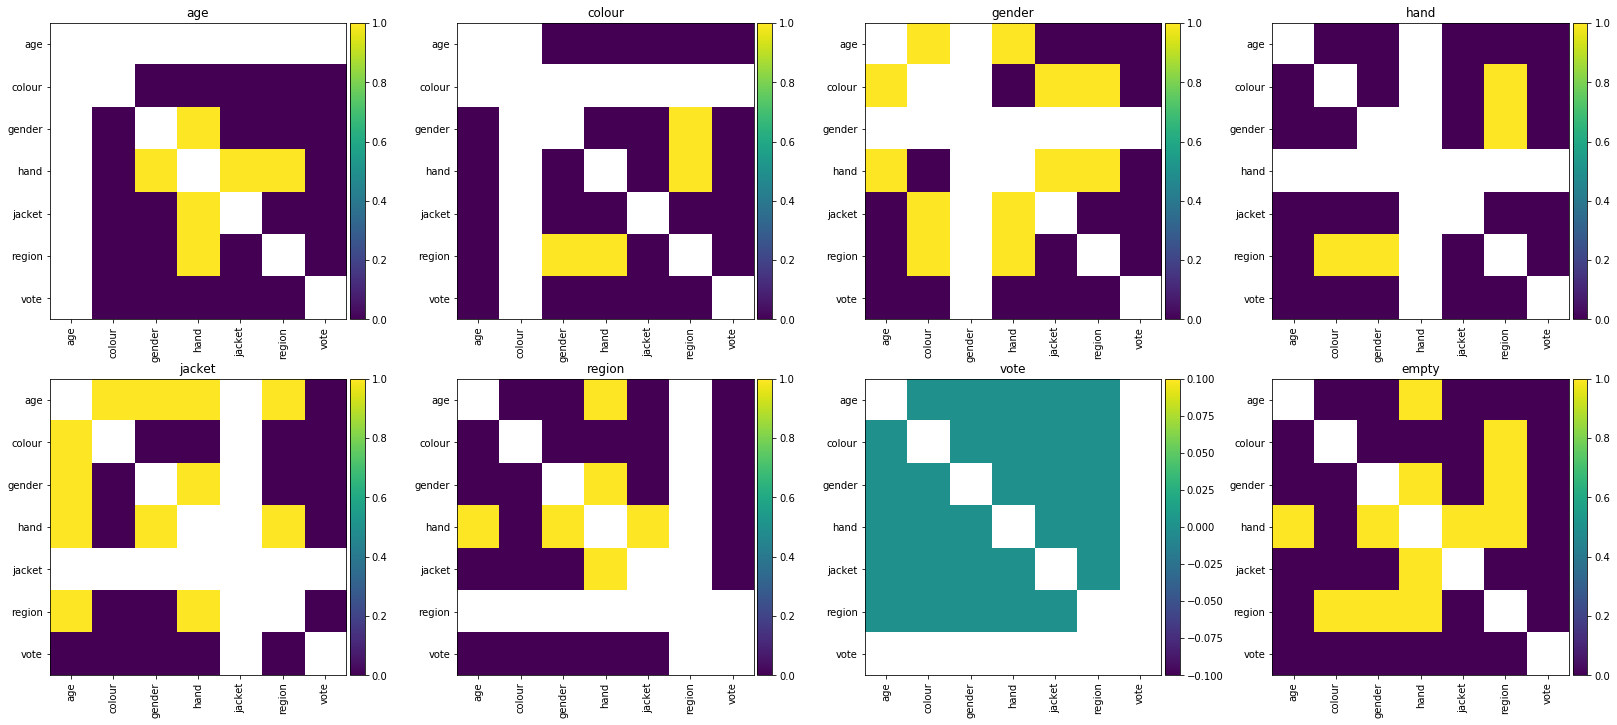

In [79]:
# replace this with your solution, add and remove code and markdown cells as appropriate
#  Q3
from mpl_toolkits.axes_grid1 import make_axes_locatable

label = []
for node in election_model.random_variables:
    label.append(node.name)
label = sorted(label)
all_Z = []
ordered = []
for l in label:
    for node in election_model.random_variables:
        if node.name == l:
            ordered.append(node)
            
for o in ordered:
    all_Z.append({o})
all_Z.append({})

plt.figure(figsize=(28,12))
i=1
all_image = []
for Z in all_Z:
    f = plt.subplot(2,4,i)
    i = i+1
    if len(list(Z))==0:
        title = "empty"
    else:
        title = list(Z)[0].name
    image = [[0 for x in range(len(ordered))] for y in range(len(ordered))] 
    for X in range(len(ordered)):
        for Y in range(len(ordered)):
            if len(list(Z))!=0:
                if ordered[X] == ordered[Y] or ordered[X] == list(Z)[0] or ordered[Y] == list(Z)[0]:  #X,Y,Z cannot have the same element
                    image[X][Y] = None
                else:
                    independent = conditionally_independent(election_model, ordered[X], ordered[Y], Z)
                    if independent:
                        image[X][Y] = 1
                    else:
                        image[X][Y] = 0
            else:
                if ordered[X] == ordered[Y]:  #X,Y cannot have the same element
                    image[X][Y] = None
                else:
                    independent = conditionally_independent(election_model, ordered[X], ordered[Y], {'empty'})
                    if independent:
                        image[X][Y] = 1
                    else:
                        image[X][Y] = 0
    #print(image)
    all_image.append(image)
    plot_image(np.array(image, dtype = float), label, title)

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>

Q4. Each plot is symmetric along the diagonal, because if node A is conditional independent of node B given C, then node B is also conditional independent of node A given C. And when Z is {vote}, all pairs are not conditional independent. And when Z is {gender}, or {jacket} or empty, more pairs are conditional independent.

# 5B (2 marks) Estimated Conditional Independence from Samples

1. Suggest and justify a heuristic "conditional independence score"; include any relevant background in your discussion. This score should be a function of a set of samples from a directed graphical model (with categorical variables), and should not make use of knowledge of the directed graphical model structure or parameters. The score provide indicate somehow whether $X\perp Y \,\, | \,\,Z$.
- Implement your score in an efficient and suitably general manner. For simplicity, your score should be ``np.nan`` if any of $X,Y$ or an element of $Z$ are the same (nans will appear white in your plotted image). Run the code on samples from the ``election_model``. **Your code should run in less than about three minutes; if necessary speed it up by making the implementation more efficient and/or reducing the number of samples used.**
- Visualise your score alongside the (binary valued) conditional independences that you computed and plotted in the previous question (for the same range of values of $Z$, $X$ and $Y$). Use ``plot_two_images`` in the code fragment below. Order all plots (rows, columns, figures) alphabetically by the name of the random variable, where possible.
- Identify the highest and lowest heuristic scoring cases (a case being an $X,Y,Z$ triple) for both the theoretically conditionally independent and the **not** theoretically conditionally independent cases. That is four examples in total. Print the cases along with their heurstic scores, and explain your intuition for what you see.



In [80]:
# provided code, do not edit

def plot_two_images(image1, image2, labels, the_title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plot_image(image1, labels, '')
    plt.subplot(1,2,2)
    plot_image(image2, labels, '')
    plt.suptitle(the_title)

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution, add and remove code and markdown cells as appropriate ---</i>
1. If $X\perp Y \,\, | \,\,Z$, then $p(X,Y|Z)$ should be equal to $p(X|Z)p(Y|Z)$. In my heuristic "conditional independence score", I calculate the absolute difference value between $p(X,Y|Z)$ and $p(X|Z)p(Y|Z)$ which is $\Cond p(X,Y|Z) - p(X|Z)p(Y|Z)\Cond$. And if the absolute difference value is smaller, then $p(X,Y|Z)$ is more close to $p(X|Z)p(Y|Z)$. If $p(X,Y|Z)$ is more close to $p(X|Z)p(Y|Z)$, then X has higher probability to conditionally independent of Y given Z. So I use $1-\Cond p(X,Y|Z) - p(X|Z)p(Y|Z)\Cond$ as the conditional independence score. The score is higher, X has higher probability to conditionally independent of Y given Z.

In [84]:
# replace this with your solution, add and remove code and markdown cells as appropriate
# Q2
def sample_conditionally_independent(samples, X, Y, Z):
    score = 0
    if len(list(Z))!=0:    #Z is not empty
        if (X == Y) or (X in list(Z)) or (Y in list(Z)):
            score = np.nan
        else:
            all_outcomes = []
            all_outcomes.append(X.outcomes)
            all_outcomes.append(Y.outcomes)
            z = list(Z)[0]
            all_outcomes.append(z.outcomes)
            all_combinations = list(itertools.product(*all_outcomes))   #[(X,Y,Z)]
            #print(all_combinations)
            all_difference = []
            for combination in all_combinations:
                #print(combination)
                total_time = 0
                X_Y_time = 0
                X_time = 0
                Y_time = 0
                useful_sample = []
                X_Y_sample = []
                X_sample = []
                Y_sample = []
                for sample in samples:
                    sample_value = list(sample.values())
                    if combination[2] in sample_value:
                        useful_sample.append(sample_value)
                        total_time = total_time + 1 
                    if (combination[0] in sample_value) and (combination[1] in sample_value) and (combination[2] in sample_value):
                        #use to calculate p(X,Y|Z)
                        X_Y_time = X_Y_time + 1
                        X_Y_sample.append(sample_value)
                    if (combination[0] in sample_value) and (combination[2] in sample_value):
                        #use to calculate p(X|Z)
                        X_time = X_time + 1 
                        X_sample.append(sample_value)
                    if (combination[1] in sample_value) and (combination[2] in sample_value):
                        #use to calculate p(Y|Z)
                        Y_time = Y_time + 1
                        Y_sample.append(sample_value)
                if total_time != 0:
                    X_Y_ON_Z = X_Y_time / total_time
                    X_ON_Z = X_time / total_time
                    Y_ON_Z = Y_time / total_time
                    difference = np.abs(X_Y_ON_Z - X_ON_Z * Y_ON_Z)
                all_difference.append(difference)
                score = (1-2*max(all_difference))
    else:    #Z is empty
        if X == Y:
            score = np.nan
        else:
            all_outcomes = []
            all_outcomes.append(X.outcomes)
            all_outcomes.append(Y.outcomes)
            all_combinations = list(itertools.product(*all_outcomes))   #[(X,Y)]
            #print(all_combinations)
            all_difference = []
            for combination in all_combinations:
                #print(combination)
                total_time = 0
                X_Y_time = 0
                X_time = 0
                Y_time = 0
                useful_sample = []
                X_Y_sample = []
                X_sample = []
                Y_sample = []
                for sample in samples:
                    sample_value = list(sample.values())
                    if (combination[0] in sample_value) and (combination[1] in sample_value):
                        #use to calculate p(X,Y|Z)
                        X_Y_time = X_Y_time + 1
                        X_Y_sample.append(sample_value)
                    if (combination[0] in sample_value):
                        #use to calculate p(X|Z)
                        X_time = X_time + 1 
                        X_sample.append(sample_value)
                    if (combination[1] in sample_value):
                        #use to calculate p(Y|Z)
                        Y_time = Y_time + 1
                        Y_sample.append(sample_value)
                X_Y_ON_Z = X_Y_time / len(samples)
                X_ON_Z = X_time / len(samples)
                Y_ON_Z = Y_time / len(samples)
                difference = np.abs(X_Y_ON_Z - X_ON_Z * Y_ON_Z)
                all_difference.append(difference)
            score = (1-2*max(all_difference))
    return score

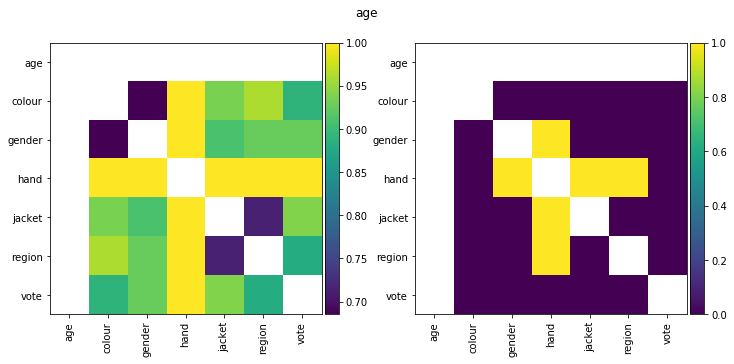

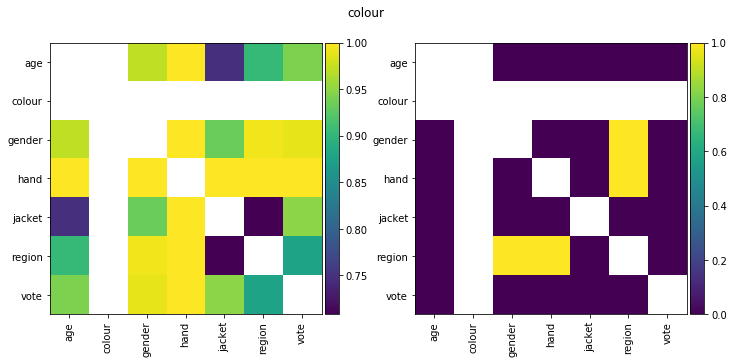

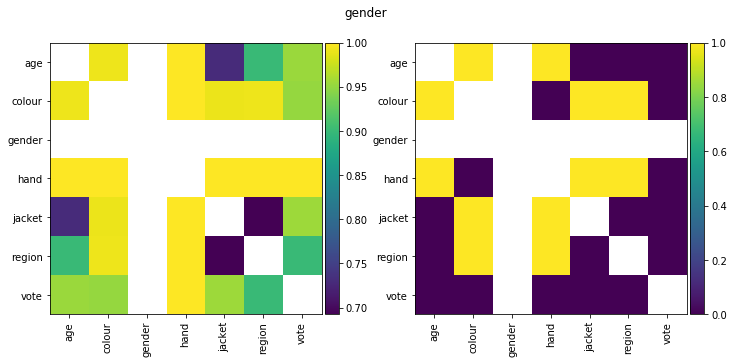

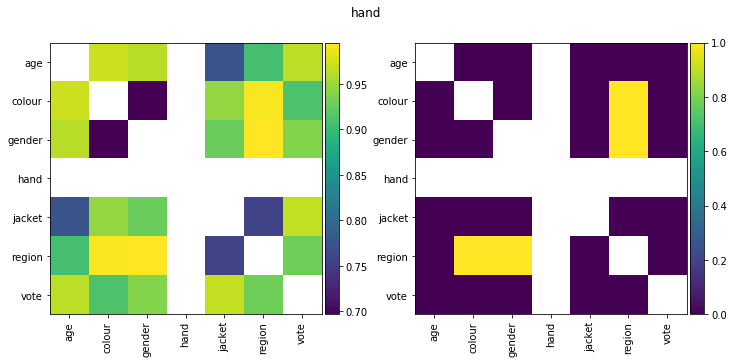

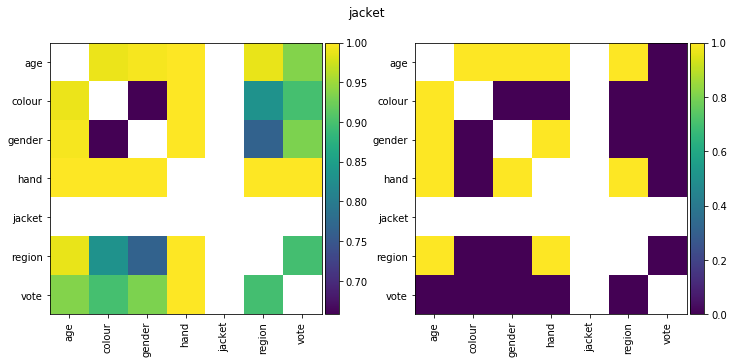

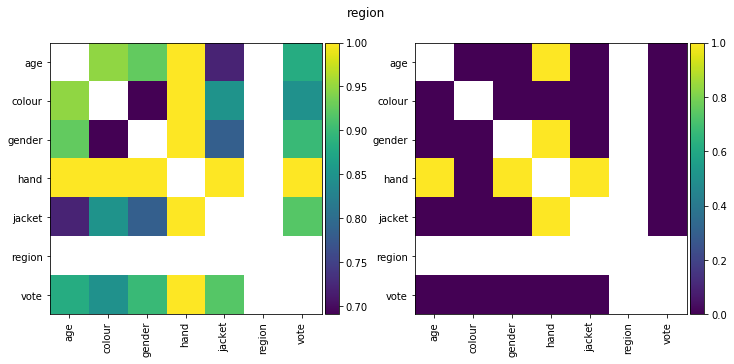

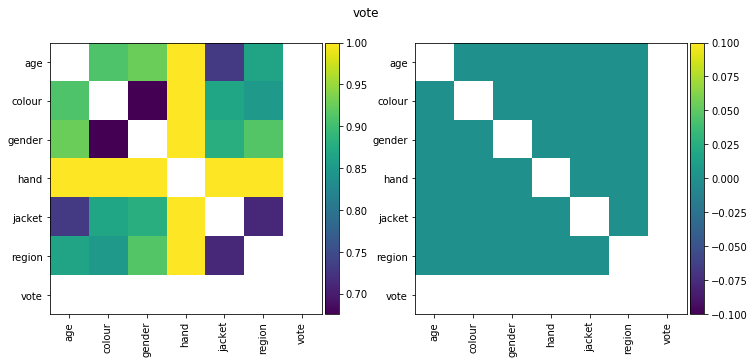

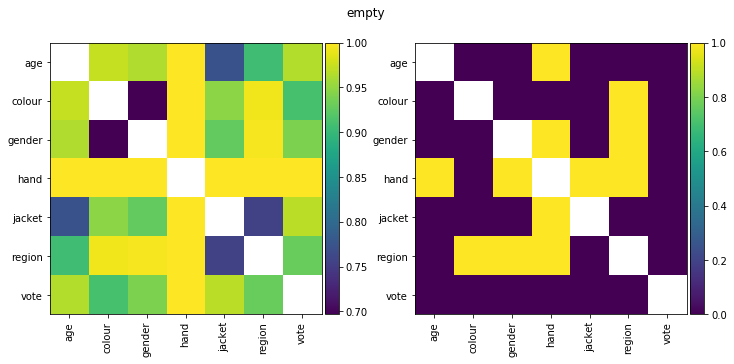

In [85]:
# replace this with your solution, add and remove code and markdown cells as appropriate
# Q3
samples = []
for i in range(10000):
    sample = AncestralSampler(election_model, ordering).sample()
    samples.append(sample)
    
all_image2 = all_image
all_image1 = []
titles = []
for Z in all_Z:
    if len(list(Z))==0:
        title = "empty"
        titles.append(title)
    else:
        title = list(Z)[0].name
        titles.append(title)
    image = [[0 for x in range(len(ordered))] for y in range(len(ordered))] 
    for X in range(len(ordered)):
        for Y in range(len(ordered)):
            score = sample_conditionally_independent(samples, ordered[X], ordered[Y], Z)
            image[X][Y] = score
    all_image1.append(image)
    
for i in range(len(all_image1)):
    plot_two_images(np.array(all_image1[i], dtype = float), np.array(all_image2[i], dtype = float), label, titles[i])  

Form the graphs, we can see that the yellow parts in the right side are also yellow or close to yellow in the left side.

In [86]:
# replace this with your solution, add and remove code and markdown cells as appropriate
# Q4
XYZ = []
X = list(election_model.random_variables)
Y = list(election_model.random_variables)
Z = []
for item in election_model.random_variables:
    Z.append({item})
Z.append({})
XYZ.append(X)
XYZ.append(Y)
XYZ.append(Z)
independent_triple = {}
dependent_triple = {}
all_combinations = list(itertools.product(*XYZ))

for combination in all_combinations:
    key = []
    key.append(combination[0])
    key.append(combination[1])
    if len(list(combination[2])) != 0:
        key.append(list(combination[2])[0])
        z = combination[2]
    else:
        key.append('empty')
        z = {'empty'}
    independent = conditionally_independent(election_model, combination[0], combination[1], z)
    score = sample_conditionally_independent(samples, combination[0], combination[1], combination[2]) 
    if independent:
        independent_triple[tuple(key)] = score
    else:
        dependent_triple[tuple(key)] = score
#print(independent_triple)
#print(dependent_triple)
independent_max = 0
independent_min = 1
dependent_max = 0
dependent_min = 1
for key in independent_triple.keys():
    score = independent_triple.get(key)
    if score > independent_max:
        independent_max = score
        independent_max_triple = key
    if score < independent_min:
        independent_min = score
        independent_min_triple = key

for key in dependent_triple.keys():
    score = dependent_triple.get(key)
    if score > dependent_max:
        dependent_max = score
        dependent_max_triple = key
    if score < dependent_min:
        dependent_min = score 
        dependent_min_triple = key

print("Theoretically conditionally independent")
print("{:<7s}".format("X"), "{:<7s}".format("Y"), "{:<7s}".format("Z"), "{:<7s}".format("max score"))
print("{:<7s}".format(independent_max_triple[0].name), "{:<7s}".format(independent_max_triple[1].name), "{:<7s}".format(independent_max_triple[2].name), "{:<7s}".format(str(independent_max)))
print("{:<7s}".format("X"), "{:<7s}".format("Y"), "{:<7s}".format("Z"), "{:<7s}".format("min score"))
print("{:<7s}".format(independent_min_triple[0].name), "{:<7s}".format(independent_min_triple[1].name), "{:<7s}".format(independent_min_triple[2].name), "{:<7s}".format(str(independent_min)))
print("\n")
print("Not theoretically conditionally independent")
print("{:<7s}".format("X"), "{:<7s}".format("Y"), "{:<7s}".format("Z"), "{:<7s}".format("max score"))
print("{:<7s}".format(dependent_max_triple[0].name), "{:<7s}".format(dependent_max_triple[1].name), "{:<7s}".format(dependent_max_triple[2].name), "{:<7s}".format(str(dependent_max)))
print("{:<7s}".format("X"), "{:<7s}".format("Y"), "{:<7s}".format("Z"), "{:<7s}".format("min score"))
print("{:<7s}".format(dependent_min_triple[0].name), "{:<7s}".format(dependent_min_triple[1].name), "{:<7s}".format(dependent_min_triple[2].name), "{:<7s}".format(str(dependent_min)))

Theoretically conditionally independent
X       Y       Z       max score
region  hand    gender  1.0    
X       Y       Z       min score
region  age     jacket  0.9881115683584818


Not theoretically conditionally independent
X       Y       Z       max score
region  hand    vote    1.0    
X       Y       Z       min score
gender  colour  jacket  0.657871390279219


Based on my heuristic score function, the score is higher, X has higher probability to conditionally independent of Y given Z. For the score of theoretically conditionally independent, we can see that the max score and min score are very high, even for min score, it's nearly 1, which means X is conditionally independent of Y given Z. For the score of not theoretically conditionally independent, the min score can show that node X is not conditionally independent of Y given Z, but there is some problem in max score which is also 1.